# Basketball Analysis: NBA -- Part 2
## Frank Li, Randy Zhu, Jeremy Knox, Daniel White
### Heatmaps & Playing pattern

## Potential questions of interest:  
Did Stephen Curry and James Harden have similar shooting patterns or shooting locations during the regular season or playoffs? 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import players

## First we gather shot data from both Stephen Curry and James Harden.



###  Curry data

In [2]:
def get_nba_data(endpt, params, return_url=False):

    ## endpt: https://github.com/seemethere/nba_py/wiki/stats.nba.com-Endpoint-Documentation
    ## params: dictionary of parameters: i.e., {'LeagueID':'00'}
    
    from pandas import DataFrame
    from urllib.parse import urlencode
    import json
    
    useragent = "\"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9\""
    dataurl = "\"" + "http://stats.nba.com/stats/" + endpt + "?" + urlencode(params) + "\""
    
    # for debugging: just return the url
    if return_url:
        return(dataurl)
    
    jsonstr = !wget -q -O - --user-agent={useragent} {dataurl}
    
    data = json.loads(jsonstr[0])
    
    h = data['resultSets'][0]['headers']
    d = data['resultSets'][0]['rowSet']
    
    return(DataFrame(d, columns=h))

In [3]:
allplyrs = pd.DataFrame(pd.read_pickle('allplyrs2018.p'))

In [4]:
curry_id = allplyrs[allplyrs['DISPLAY_FIRST_LAST']=='Stephen Curry']
curry_id

,DISPLAY_FIRST_LAST
PERSON_ID,
201939,Stephen Curry


In [5]:
params = {'PlayerID':'', # We'll fill this in after identifying the right player
          'PlayerPosition':'',
          'Season':'2018-19',
          'ContextMeasure':'FGA',
          'DateFrom':'',
          'DateTo':'',
          'GameID':'',
          'GameSegment':'',
          'LastNGames':'0',
          'LeagueID':'00',
          'Location':'',
          'Month':'0',
          'OpponentTeamID':'0',
          'Outcome':'',
          'Period':'0',
          'Position':'',
          'RookieYear':'',
          'SeasonSegment':'',
          'SeasonType':'Regular Season',
          'TeamID':'0',
          'VsConference':'',
          'VsDivision':''}

In [6]:
params['PlayerID']=201939

In [7]:
import json
with open('curry.json', 'r') as f:
    curry_json = json.load(f)
    
curry_json.keys()

h = curry_json['resultSets'][0]['headers']
d = curry_json['resultSets'][0]['rowSet']

curry_regseason = pd.DataFrame(data=d,columns=h)

In [8]:
if False:
    ## get all 2018-19 player ids
    params = {'LeagueID':'00', 'Season': '2018-19', 'IsOnlyCurrentSeason': '0'}
    players = get_nba_data('commonallplayers', params).set_index('PERSON_ID')

    # Player ids and names
    allplyrs = players.loc[players.TEAM_ID.isin(allteams)]['DISPLAY_FIRST_LAST'].drop_duplicates()

    ## save in a pickle file
    pickle.dump(allplyrs, open( "allplyrs2018.p", "wb" ) )

In [9]:
# downloads allplyrs1028.p if needed
!wget -q -nc https://ucsb.box.com/shared/static/oicfhmyb5docjnu7nfmhaf3lvafc1am6.p \
    -O allplyrs2018.p

allplyrs = pd.read_pickle("allplyrs2018.p")
allplyrs.head()

PERSON_ID
1629121         Jaylen Adams
203500          Steven Adams
1628389          Bam Adebayo
1629061            Deng Adel
200746     LaMarcus Aldridge
Name: DISPLAY_FIRST_LAST, dtype: object

### Shot chart data from Stephen Curry's regular season games.

In [10]:
if False:
    ## get shot data for Stephen Curry and pickle it
    curry_regseason = get_nba_data('shotchartdetail', params, return_url=False)
    pickle.dump(allplyrs, open( "curry2018.p", "wb" ) )
if True: 
    ## produce url to json of currys regular season shot data
    curry_url = get_nba_data('shotchartdetail', params, return_url=True)
print(curry_url)

"http://stats.nba.com/stats/shotchartdetail?PlayerID=201939&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&SeasonType=Regular+Season&TeamID=0&VsConference=&VsDivision="


In [11]:
curry_regseason

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021800002,10,201939,Stephen Curry,1610612744,Golden State Warriors,1,11,31,...,Right Side Center(RC),24+ ft.,24,226,90,1,1,20181016,GSW,OKC
1,Shot Chart Detail,0021800002,58,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,57,...,Center(C),Less Than 8 ft.,6,-2,63,1,1,20181016,GSW,OKC
2,Shot Chart Detail,0021800002,131,201939,Stephen Curry,1610612744,Golden State Warriors,1,3,46,...,Center(C),Less Than 8 ft.,2,5,29,1,1,20181016,GSW,OKC
3,Shot Chart Detail,0021800002,141,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,58,...,Center(C),Less Than 8 ft.,1,-6,18,1,0,20181016,GSW,OKC
4,Shot Chart Detail,0021800002,145,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,49,...,Left Side(L),24+ ft.,22,-228,8,1,1,20181016,GSW,OKC
5,Shot Chart Detail,0021800002,276,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,39,...,Right Side(R),8-16 ft.,9,96,25,1,0,20181016,GSW,OKC
6,Shot Chart Detail,0021800002,293,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,5,...,Left Side Center(LC),24+ ft.,28,-204,195,1,1,20181016,GSW,OKC
7,Shot Chart Detail,0021800002,368,201939,Stephen Curry,1610612744,Golden State Warriors,2,1,3,...,Center(C),Less Than 8 ft.,2,6,25,1,1,20181016,GSW,OKC
8,Shot Chart Detail,0021800002,374,201939,Stephen Curry,1610612744,Golden State Warriors,2,0,44,...,Right Side(R),8-16 ft.,12,113,52,1,0,20181016,GSW,OKC
9,Shot Chart Detail,0021800002,418,201939,Stephen Curry,1610612744,Golden State Warriors,3,9,47,...,Center(C),24+ ft.,28,25,281,1,1,20181016,GSW,OKC


### Shot chart data from Stephen Curry's playoff games.

In [12]:
params['SeasonType']='Playoffs'

In [13]:
import json
with open('curry_playoffs.json', 'r') as f:
    curry_json = json.load(f)
    
curry_json.keys()

h = curry_json['resultSets'][0]['headers']
d = curry_json['resultSets'][0]['rowSet']

curry_playoffs = pd.DataFrame(data=d,columns=h)

In [14]:
curry_playoffs.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0041800141,88,201939,Stephen Curry,1610612744,Golden State Warriors,1,6,15,...,Right Side Center(RC),24+ ft.,26,180,201,1,0,20190413,GSW,LAC
1,Shot Chart Detail,0041800141,104,201939,Stephen Curry,1610612744,Golden State Warriors,1,4,54,...,Center(C),Less Than 8 ft.,3,-18,28,1,0,20190413,GSW,LAC
2,Shot Chart Detail,0041800141,114,201939,Stephen Curry,1610612744,Golden State Warriors,1,4,11,...,Center(C),24+ ft.,29,-19,293,1,1,20190413,GSW,LAC
3,Shot Chart Detail,0041800141,160,201939,Stephen Curry,1610612744,Golden State Warriors,1,0,42,...,Right Side Center(RC),24+ ft.,25,222,120,1,1,20190413,GSW,LAC
4,Shot Chart Detail,0041800141,166,201939,Stephen Curry,1610612744,Golden State Warriors,1,0,0,...,Back Court(BC),Back Court Shot,55,-7,557,1,0,20190413,GSW,LAC


### Create basketball court and shot regions for visual analysis.

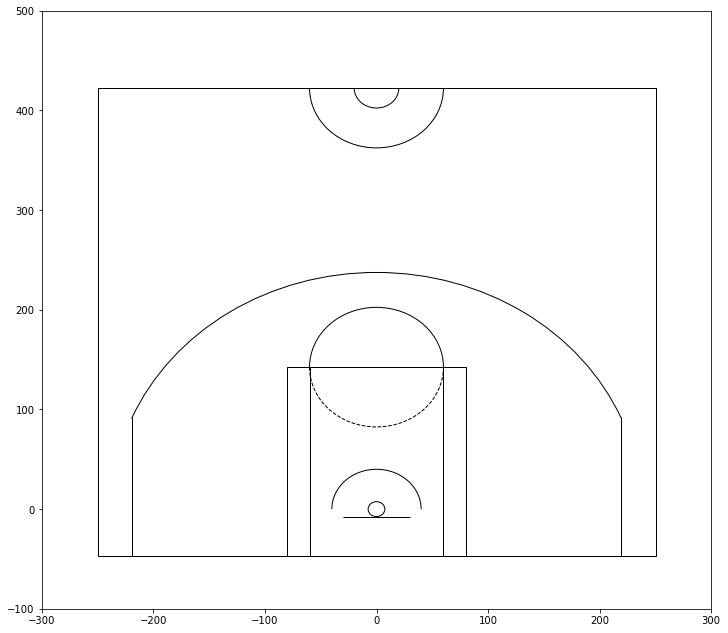

In [15]:
def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    
    from matplotlib.patches import Circle, Rectangle, Arc
    from matplotlib.pyplot import gca
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-219, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((219, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22.5, theta2=157.5, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [16]:
def bin_shots(df, bin_edges, density=False, sigma=1):
    
    """Given data frame of shots, compute a 2d matrix of binned counts is computed
    
    Args:
        df: data frame of shotchartdetail from nba.com. 
            At the minimum, variables named LOCX and LOCY are required.
        bin_edges: bin edge definition: edges in x and edges in y
    
    Returns:
        binned: counts
        xedges: bin edges in X direction
        yedges: bin edges in Y direction
    """
    import numpy as np
    from scipy import ndimage
    
    ## Call np.histogram2d
    binned, xedges, yedges = np.histogram2d(df.LOC_X, df.LOC_Y, bins = bin_edges) ################
    
    if density:

        # Recompute 'binned' using "gaussian_filter"
        binned = ndimage.filters.gaussian_filter(binned, sigma)
        
        # Normalize the histogram to be a "density", e.g. mass across all bins sums to 1.
        binned /= np.sum(binned)
    
    return(binned, xedges, yedges)


In [17]:
## bin edge definitions in inches
xedges = np.linspace(start=-300, stop=300, num=151)
yedges = np.linspace(start=-48, stop=372, num=106)

In [18]:
def plot_shotchart(binned_counts, xedges, yedges, ax=None, use_log=False, cmap = 'Blues'):
    
    """Plots 2d heatmap from vectorized heatmap counts
    
    Args:
        hist_counts: vectorized output of numpy.histogram2d
        xedges, yedges: bin edges in arrays
        ax: figure axes [None]
        use_log: will convert count x to log(x+1) to increase visibility [False]
        cmap: Set the color map https://matplotlib.org/examples/color/colormaps_reference.html
    Returns:
        ax: axes with plot
    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    ## number of x and y bins.  
    nx = xedges.size - 1
    ny = yedges.size - 1

    X, Y = np.meshgrid(xedges, yedges)
    
    if use_log:
        counts = np.log(binned_counts + 1)
        
    if ax is None:
        fig, ax = plt.subplots(1,1)
    
    ax.pcolormesh(X, Y, binned_counts.T, cmap=cmap) 
    ax.set_aspect('equal')
    
    draw_court(ax)
    
    return(ax)



### Curry regular season shot chart

In [19]:
bin_edges = (xedges, yedges)
curry_reg_binned1 = bin_shots(curry_regseason, bin_edges, density=False)
curry_reg_binned2 = bin_shots(curry_regseason, bin_edges, density=True, sigma=2)

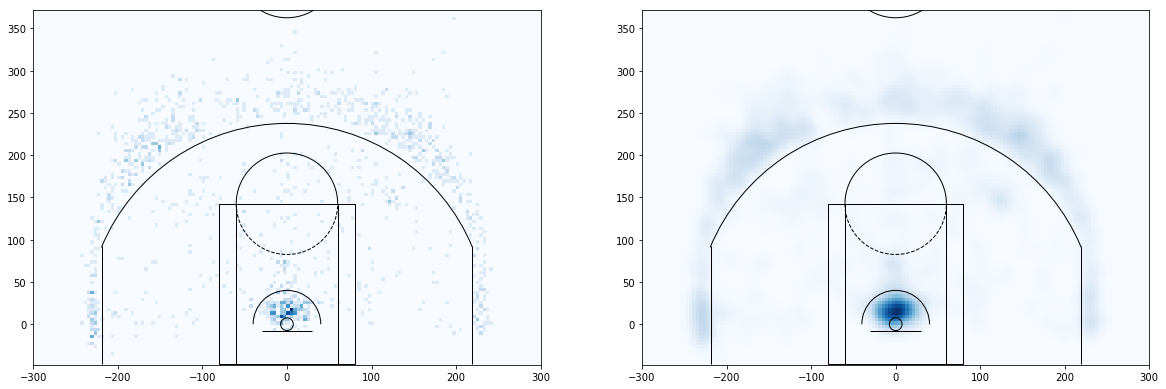

In [20]:
fig, ax = plt.subplots(1,2, figsize=(20,60))
plot_shotchart(curry_reg_binned1[0], xedges, yedges, ax=ax[0])
plot_shotchart(curry_reg_binned2[0], xedges, yedges, ax=ax[1])

###  Curry playoff shot chart

In [21]:
bin_edges = (xedges, yedges)
curry_playoff_binned1 = bin_shots(curry_playoffs, bin_edges, density=False)
curry_playoff_binned2 = bin_shots(curry_playoffs, bin_edges, density=True, sigma=2)

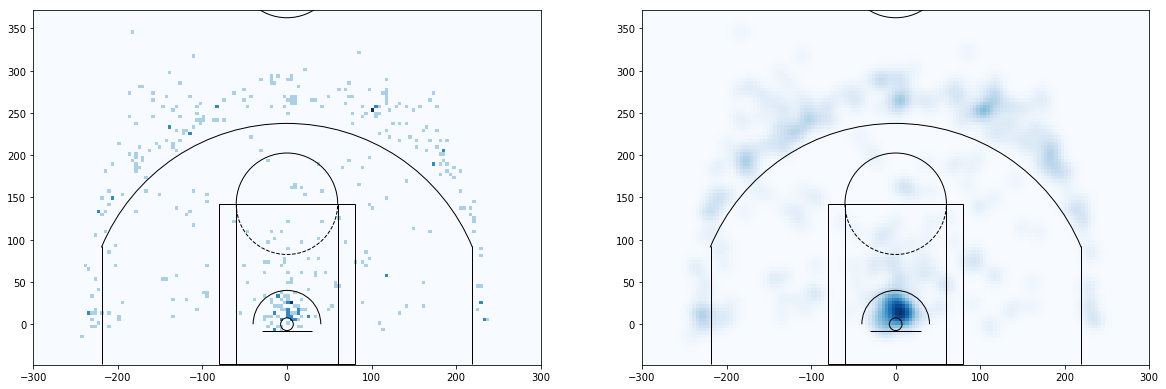

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20,60))
plot_shotchart(curry_playoff_binned1[0], xedges, yedges, ax=ax[0])
plot_shotchart(curry_playoff_binned2[0], xedges, yedges, ax=ax[1])

In [23]:
if False:
    params = {'PlayerID':'',
              'PlayerPosition':'',
              'Season':'2018-19',
              'ContextMeasure':'FGA',
              'DateFrom':'',
              'DateTo':'',
              'GameID':'',
              'GameSegment':'',
              'LastNGames':'0',
              'LeagueID':'00',
              'Location':'',
              'Month':'0',
              'OpponentTeamID':'0',
              'Outcome':'',
              'Period':'0',
              'Position':'',
              'RookieYear':'',
              'SeasonSegment':'',
              'SeasonType':'Regular Season',
              'TeamID':'0',
              'VsConference':'',
              'VsDivision':''}

    shotdf = []
    for p in allplyrs.index.values:
        print(p)

        # get player p's data
        params['PlayerID'] = p
        
        # scrape the json data
        playerdata = get_nba_data('shotchartdetail', params)
        
        # add playerID to the dictionary
        playerdata['PlayerID'] = p
        
        # add to the list of player data frames
        shotdf += [playerdata]
    
    # This concats a list of data frame's into one big data frame
    allshots = pd.concat(shotdf)

    # Save the json
    pickle.dump(allshots, open('allshots2018.p', 'wb'))
    
if True:
    
    # Downloads allshots2018.p if needed
    !wget -q -nc https://ucsb.box.com/shared/static/c8e402js320ejse3txxpdp84m1qy88q0.p \
        -O allshots2018.p
    
    allshots = pd.read_pickle('allshots2018.p')

In [24]:
## number of bins is one less than number of edges
nx = xedges.size - 1
ny = yedges.size - 1

## 2d histogram containers for binned counts and smoothed binned counts
all_counts = []
all_smooth = []
pids = []

## 2d histogram containers for binned counts and smoothed binned counts

## data matrix: players (row) by vectorized 2-d court locations (column)
for i, one in enumerate(allshots.groupby('PlayerID')):
    
    ## what does this line do?
    pid, pdf = one
        
    num_shots = len(pdf.index)
    if(num_shots > 100): 
        
        tmp1, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=True, sigma=2)
        tmp2, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=False)
    
        ## vectorize and store into list
        all_smooth += [tmp1.reshape(-1)]
        all_counts += [tmp2.reshape(-1)]
        pids += [pid]

In [25]:
X1 = np.vstack(all_smooth).T
p, n = X1.shape

print('Number of shot regions (p):', p)
print('Number of players (n):', n)

Number of shot regions (p): 15750
Number of players (n): 388


In [26]:
## Non-negative Matrix Factorization
def non_negative_marix_decomp(n_components, array_data):
    import sklearn.decomposition as skld
    model = skld.NMF(n_components=n_components, init='nndsvda', max_iter=500, random_state=0)
    W = model.fit_transform(array_data)
    
    # Normalize basis vectors to sum to 1
    Wsum = W.sum(axis=0)
    W = W/Wsum
    
    ## fix H correspondingly
    H = model.components_
    H = (H.T * Wsum).T

    nmf = (W, H)
    return(nmf)

In [27]:
W8, H8 = non_negative_marix_decomp(n_components=8, array_data=X1)

In [28]:
def plot_vectorized_shotchart(vec_counts, xedges, yedges, ax=None, use_log=False, cmap = 'Blues'):
    
    """Plots 2d heatmap from vectorized heatmap counts
    
    Args:
        hist_counts: vectorized output of numpy.histogram2d
        xedges, yedges: bin edges in arrays
        ax: figure axes [None]
        use_log: will convert count x to log(x+1) to increase visibility [False]
        cmap: Set the color map https://matplotlib.org/examples/color/colormaps_reference.html
    Returns:
        ax: axes with plot
    """

    nx = xedges.size - 1
    ny = yedges.size - 1
    
    # use reshape to convert a vectorized counts back into a 2d histogram
    two_d_counts = np.reshape(vec_counts, (nx,ny))
    
    return(plot_shotchart(two_d_counts, xedges, yedges, ax=ax, use_log=use_log, cmap=cmap))



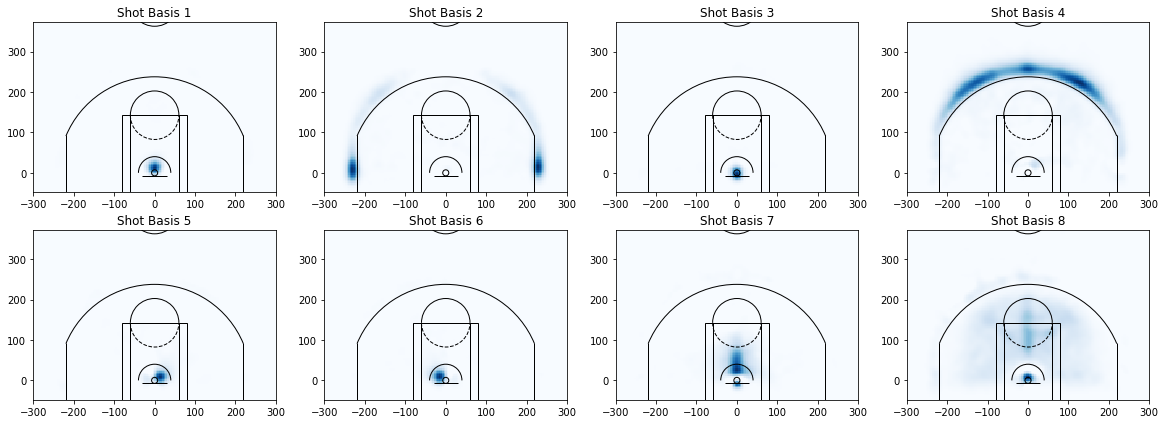

In [29]:
fig, ax = plt.subplots(2, 4, figsize=(20, 7))

for i in range(8):
    plot_vectorized_shotchart(W8[:,i], xedges, yedges, ax=ax[i//4,i%4])
    ax[i//4, i % 4].set_title('Shot Basis %i' % (i+1))

This shows 8 different bases which represent different types of shooting styles from the data set of all shots taken during the regular season. The non-negative matrix factorization function above normalizes the basis surfaces, resulting in a sum of 1. The darkened blue areas from each shot basis chart show the concentrated areas which players tended to shoot more from. By looking at shot basis 4, we can see that players like to shoot either looking directly at the basket or at a slight angle between 10 and 25 degrees, roughly, from both sides of the basket.

## HARDEN DATA

### Shot chart data from James Harden's regular season games.

In [30]:
harden_id = allplyrs[allplyrs=='James Harden']
harden_id

PERSON_ID
201935    James Harden
Name: DISPLAY_FIRST_LAST, dtype: object

In [31]:
params = {'PlayerID':'', # We'll fill this in after identifying the right player
          'PlayerPosition':'',
          'Season':'2018-19',
          'ContextMeasure':'FGA',
          'DateFrom':'',
          'DateTo':'',
          'GameID':'',
          'GameSegment':'',
          'LastNGames':'0',
          'LeagueID':'00',
          'Location':'',
          'Month':'0',
          'OpponentTeamID':'0',
          'Outcome':'',
          'Period':'0',
          'Position':'',
          'RookieYear':'',
          'SeasonSegment':'',
          'SeasonType':'Regular Season',
          'TeamID':'0',
          'VsConference':'',
          'VsDivision':''}

In [32]:
params['PlayerID']=201935

In [33]:
with open('harden.json', 'r') as f:
    harden_json = json.load(f)
    
harden_json.keys()

h = harden_json['resultSets'][0]['headers']
d = harden_json['resultSets'][0]['rowSet']

harden_regseason = pd.DataFrame(data=d,columns=h)

In [34]:
harden_regseason.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021800009,11,201935,James Harden,1610612745,Houston Rockets,1,11,17,...,Center(C),Less Than 8 ft.,1,3,12,1,0,20181017,HOU,NOP
1,Shot Chart Detail,0021800009,28,201935,James Harden,1610612745,Houston Rockets,1,9,33,...,Center(C),24+ ft.,27,-61,264,1,0,20181017,HOU,NOP
2,Shot Chart Detail,0021800009,55,201935,James Harden,1610612745,Houston Rockets,1,7,51,...,Center(C),24+ ft.,25,-1,259,1,0,20181017,HOU,NOP
3,Shot Chart Detail,0021800009,103,201935,James Harden,1610612745,Houston Rockets,1,4,12,...,Left Side Center(LC),24+ ft.,26,-120,232,1,1,20181017,HOU,NOP
4,Shot Chart Detail,0021800009,246,201935,James Harden,1610612745,Houston Rockets,2,6,6,...,Center(C),Less Than 8 ft.,2,3,20,1,1,20181017,HOU,NOP


In [35]:
bin_edges = (xedges, yedges)
harden_reg_binned1 = bin_shots(harden_regseason, bin_edges, density=False)
harden_reg_binned2 = bin_shots(harden_regseason, bin_edges, density=True, sigma=2)

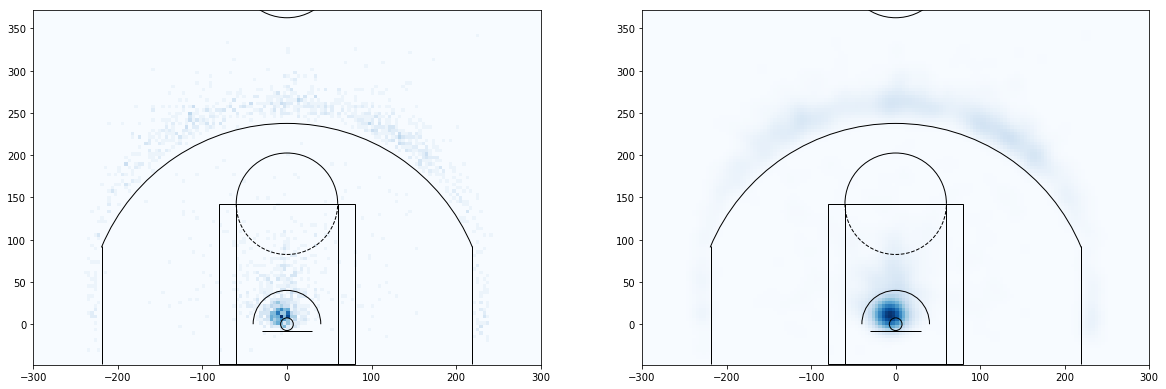

In [36]:
fig, ax = plt.subplots(1,2, figsize=(20,60))
plot_shotchart(harden_reg_binned1[0], xedges, yedges, ax=ax[0])
plot_shotchart(harden_reg_binned2[0], xedges, yedges, ax=ax[1])

### Shot chart data from James Harden's playoff games.

In [37]:
import json
with open('harden_playoffs.json', 'r') as f:
    harden_json = json.load(f)
    
harden_json.keys()

h = harden_json['resultSets'][0]['headers']
d = harden_json['resultSets'][0]['rowSet']

harden_playoffs = pd.DataFrame(data=d,columns=h)

In [38]:
harden_playoffs.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0041800171,48,201935,James Harden,1610612745,Houston Rockets,1,7,2,...,Right Side Center(RC),24+ ft.,24,186,152,1,1,20190414,HOU,UTA
1,Shot Chart Detail,0041800171,63,201935,James Harden,1610612745,Houston Rockets,1,5,45,...,Left Side Center(LC),24+ ft.,26,-167,208,1,1,20190414,HOU,UTA
2,Shot Chart Detail,0041800171,68,201935,James Harden,1610612745,Houston Rockets,1,5,11,...,Center(C),Less Than 8 ft.,1,9,9,1,1,20190414,HOU,UTA
3,Shot Chart Detail,0041800171,72,201935,James Harden,1610612745,Houston Rockets,1,4,41,...,Center(C),Less Than 8 ft.,1,-4,15,1,1,20190414,HOU,UTA
4,Shot Chart Detail,0041800171,79,201935,James Harden,1610612745,Houston Rockets,1,3,33,...,Center(C),Less Than 8 ft.,5,-9,51,1,0,20190414,HOU,UTA


In [39]:
bin_edges = (xedges, yedges)
harden_playoff_binned1 = bin_shots(harden_playoffs, bin_edges, density=False)
harden_playoff_binned2 = bin_shots(harden_playoffs, bin_edges, density=True, sigma=3)

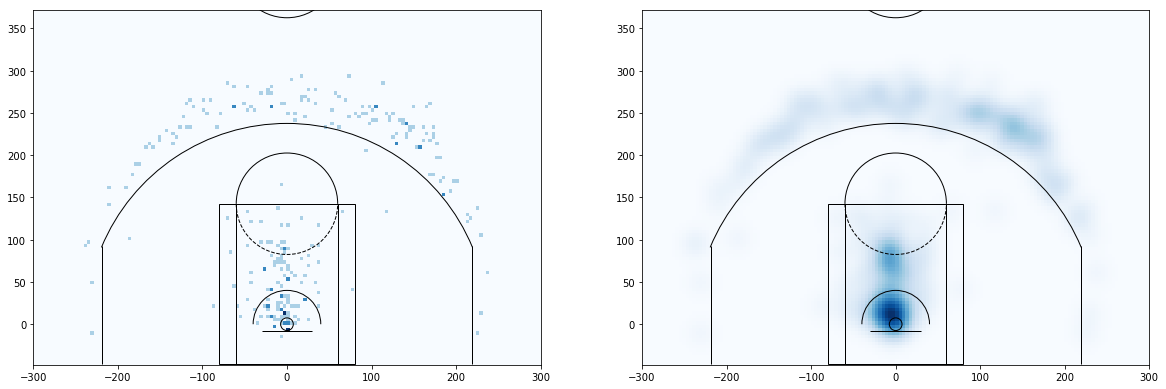

In [40]:
fig, ax = plt.subplots(1,2, figsize=(20,60))
plot_shotchart(harden_playoff_binned1[0], xedges, yedges, ax=ax[0])
plot_shotchart(harden_playoff_binned2[0], xedges, yedges, ax=ax[1])

### Stephen Curry regular season shot chart

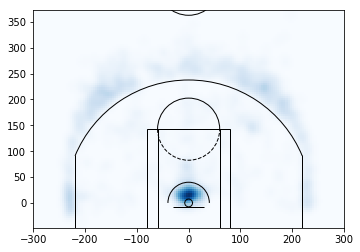

In [41]:
plot_shotchart(curry_reg_binned2[0], xedges, yedges, cmap = 'Blues')

### James Harden regular season shot chart

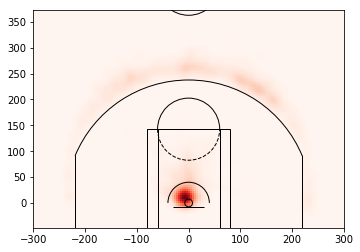

In [42]:
plot_shotchart(harden_reg_binned2[0], xedges, yedges, cmap = 'Reds')

As we can see from the above plots, the positioning of where shots are taken from Stephen Curry and James Harden are very different. The above 2D heat map shows that Stephen Curry does not favor taking shots from a specific location or region on the court, especially when it comes to three point shots. Comparing this to James Harden, it is pretty evident that James Harden likes to shoot near the top of the key, ranging between the center left and center right location beyond the 3 point arc. It is also shown that James Harden tends to drive more from the right side when attempting lay ups or very close range shots near the rim, whereas Stephen Curry takes a more well rounded approach, shooting from all angles near the rim. This is shown by the darker red areas on the heatmaps above.

## Gather playoff shot data from starting 5 players on both Warriors and Rockets teams

In [43]:
import json
with open('Draymond_Green.json', 'r') as f:
    green_json = json.load(f)
    
green_json.keys()

h = green_json['resultSets'][0]['headers']
d = green_json['resultSets'][0]['rowSet']

green_playoffs = pd.DataFrame(data=d,columns=h)

In [44]:
import json
with open('Klay_Thompson.json', 'r') as f:
    thompson_json = json.load(f)
    
thompson_json.keys()

h = thompson_json['resultSets'][0]['headers']
d = thompson_json['resultSets'][0]['rowSet']

thompson_playoffs = pd.DataFrame(data=d,columns=h)

In [45]:
import json
with open('Andre_Iguodala.json', 'r') as f:
    iguodala_json = json.load(f)
    
iguodala_json.keys()

h = iguodala_json['resultSets'][0]['headers']
d = iguodala_json['resultSets'][0]['rowSet']

iguodala_playoffs = pd.DataFrame(data=d,columns=h)

In [46]:
import json
with open('Kevin_Durant.json', 'r') as f:
    durant_json = json.load(f)
    
durant_json.keys()

h = durant_json['resultSets'][0]['headers']
d = durant_json['resultSets'][0]['rowSet']

durant_playoffs = pd.DataFrame(data=d,columns=h)

In [47]:
import json
with open('Chris_Paul.json', 'r') as f:
    paul_json = json.load(f)
    
paul_json.keys()

h = paul_json['resultSets'][0]['headers']
d = paul_json['resultSets'][0]['rowSet']

paul_playoffs = pd.DataFrame(data=d,columns=h)

In [48]:
import json
with open('Eric_Gordon.json', 'r') as f:
    gordon_json = json.load(f)
    
gordon_json.keys()

h = gordon_json['resultSets'][0]['headers']
d = gordon_json['resultSets'][0]['rowSet']

gordon_playoffs = pd.DataFrame(data=d,columns=h)

In [49]:
import json
with open('PJ_Tucker.json', 'r') as f:
    tucker_json = json.load(f)
    
tucker_json.keys()

h = tucker_json['resultSets'][0]['headers']
d = tucker_json['resultSets'][0]['rowSet']

tucker_playoffs = pd.DataFrame(data=d,columns=h)

In [50]:
import json
with open('Clint_Capela.json', 'r') as f:
    capela_json = json.load(f)
    
capela_json.keys()

h = capela_json['resultSets'][0]['headers']
d = capela_json['resultSets'][0]['rowSet']

capela_playoffs = pd.DataFrame(data=d,columns=h)

In [51]:
shot_playoff_df = ([curry_playoffs] + [harden_playoffs] + [green_playoffs] + [thompson_playoffs] + 
          [iguodala_playoffs] + [durant_playoffs] + [paul_playoffs] + [gordon_playoffs] +
          [tucker_playoffs] + [capela_playoffs])

In [52]:
playoff_shots = pd.concat(shot_playoff_df)

In [53]:
playoff_shots

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0041800141,88,201939,Stephen Curry,1610612744,Golden State Warriors,1,6,15,...,Right Side Center(RC),24+ ft.,26,180,201,1,0,20190413,GSW,LAC
1,Shot Chart Detail,0041800141,104,201939,Stephen Curry,1610612744,Golden State Warriors,1,4,54,...,Center(C),Less Than 8 ft.,3,-18,28,1,0,20190413,GSW,LAC
2,Shot Chart Detail,0041800141,114,201939,Stephen Curry,1610612744,Golden State Warriors,1,4,11,...,Center(C),24+ ft.,29,-19,293,1,1,20190413,GSW,LAC
3,Shot Chart Detail,0041800141,160,201939,Stephen Curry,1610612744,Golden State Warriors,1,0,42,...,Right Side Center(RC),24+ ft.,25,222,120,1,1,20190413,GSW,LAC
4,Shot Chart Detail,0041800141,166,201939,Stephen Curry,1610612744,Golden State Warriors,1,0,0,...,Back Court(BC),Back Court Shot,55,-7,557,1,0,20190413,GSW,LAC
5,Shot Chart Detail,0041800141,313,201939,Stephen Curry,1610612744,Golden State Warriors,2,3,21,...,Left Side Center(LC),16-24 ft.,19,-110,159,1,1,20190413,GSW,LAC
6,Shot Chart Detail,0041800141,329,201939,Stephen Curry,1610612744,Golden State Warriors,2,2,6,...,Right Side Center(RC),24+ ft.,26,154,217,1,1,20190413,GSW,LAC
7,Shot Chart Detail,0041800141,344,201939,Stephen Curry,1610612744,Golden State Warriors,2,1,18,...,Center(C),24+ ft.,26,9,260,1,1,20190413,GSW,LAC
8,Shot Chart Detail,0041800141,347,201939,Stephen Curry,1610612744,Golden State Warriors,2,0,50,...,Center(C),Less Than 8 ft.,3,-8,39,1,1,20190413,GSW,LAC
9,Shot Chart Detail,0041800141,431,201939,Stephen Curry,1610612744,Golden State Warriors,3,8,4,...,Right Side Center(RC),24+ ft.,27,185,201,1,1,20190413,GSW,LAC


In [54]:
## number of bins is one less than number of edges
nx = xedges.size - 1
ny = yedges.size - 1

## 2d histogram containers for binned counts and smoothed binned counts
all_counts = []
all_smooth = []
pids = []

## 2d histogram containers for binned counts and smoothed binned counts

## data matrix: players (row) by vectorized 2-d court locations (column)
for i, one in enumerate(playoff_shots.groupby('PLAYER_ID')):
    
    pid, pdf = one
        
    num_shots = len(pdf.index)
    if(num_shots > 80): 
        
        tmp1, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=True, sigma=2)
        tmp2, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=False)
    
        ## vectorize and store into list
        all_smooth += [tmp1.reshape(-1)]
        all_counts += [tmp2.reshape(-1)]
        pids += [pid]

In [55]:
X2 = np.vstack(all_smooth).T
p, n = X2.shape

print('Number of shot regions (p):', p)
print('Number of players (n):', n)

Number of shot regions (p): 15750
Number of players (n): 10


The NMF solves the following problem: given some matrix $X$ is $p\times n$ matrix, NMF computes the following factorization:
$$ \min_{W,H} \| X - WH \|_F\\
\text{ subject to } W\geq 0,\ H\geq 0, $$
where $W$ is ${p\times r}$ matrix and $H$ is ${r\times n}$ matrix.

#### The data matrix $X$ 
$X$ is of dimension $n$={number of players} and $p$={number of total square bins on the court}. Each column corresponds to a player, with entries corresponding to a "flattened" or "vectorized" version of the 2d histograms plotted in part 4b.

#### Bases matrix: $W$

Columns $W_i$ contain the shot "bases". 

#### Coefficient matrix: H

Each column of $H$ gives a coefficient for each of the bases vectors in $W$, and there are $n$ columns for each player.


In [56]:
## Non-negative Matrix Factorization
def non_negative_marix_decomp(n_components, array_data):
    import sklearn.decomposition as skld
    model = skld.NMF(n_components=n_components, init='nndsvda', max_iter=500, random_state=0)
    W = model.fit_transform(array_data)
    
    # Normalize basis vectors to sum to 1
    Wsum = W.sum(axis=0)
    W = W/Wsum
    
    ## fix H correspondingly
    H = model.components_
    H = (H.T * Wsum).T

    nmf = (W, H)
    return(nmf)

In [57]:
W_8, H_8 = non_negative_marix_decomp(8, array_data = X2)   # factorize data matrix X

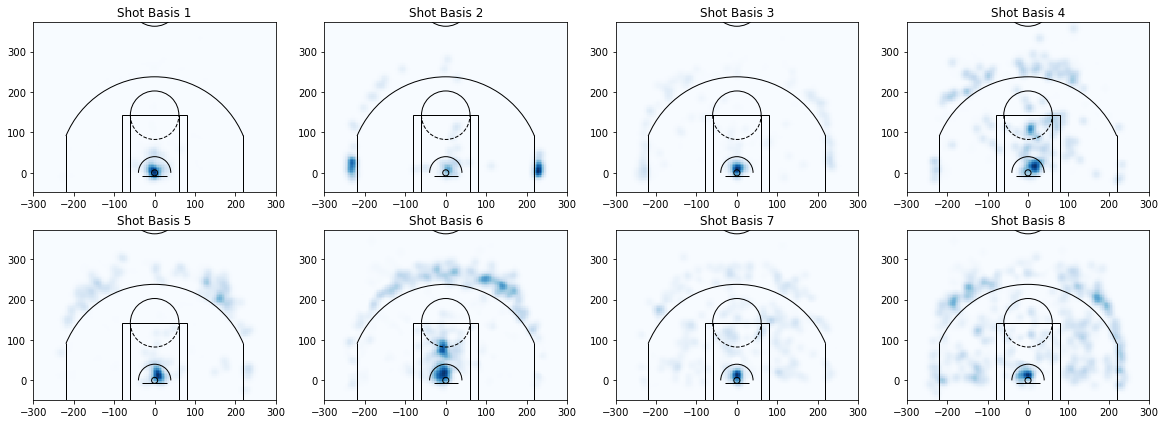

In [58]:
fig, ax = plt.subplots(2, 4, figsize=(20, 7))

## Write a for loop
for i in range(8):
    plot_vectorized_shotchart(W_8[:,i], xedges, yedges, ax=ax[i//4,i%4])
    ax[i//4, i % 4].set_title('Shot Basis %i' % (i+1))

Shown above are 8 basis shot charts, which have been calculated using the non-negative matrix factorization function.

##  Compare shooting patterns for Stephen Curry and James Harden during the playoffs.

In [70]:
# Find the player_id of Stephen Curry
curry_id = allplyrs[allplyrs == 'Stephen Curry'].index[0]

In [71]:
## find index in X corresponding to Stephen Curry
curry_idx = np.where(pids == curry_id)[0][0]

In [72]:
# Find the player_id of James Harden
harden_id = allplyrs[allplyrs == 'James Harden'].index[0]

In [73]:
## find index in X corresponding to James Harden
harden_idx = np.where(pids == harden_id)[0][0]

### Stephen Curry playoff shot chart

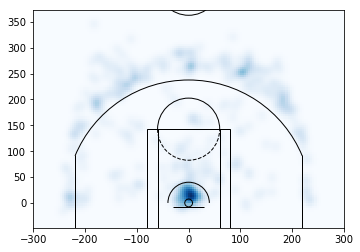

In [74]:
plot_vectorized_shotchart(X2[:, curry_idx], xedges, yedges, cmap = 'Blues')

### James Harden playoff shot chart

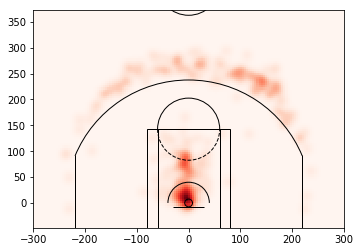

In [75]:
plot_vectorized_shotchart(X2[:, harden_idx], xedges, yedges, cmap = 'Reds')

By analyzing the shot charts above, it is pretty evident that Stephen Curry and James Harden had different shooting patterns during the playoffs. Stephen Curry's shooting pattern from behind the 3-point arc varies drastically from James Harden. Shown by the shaded blue areas, Curry takes shots from almost any region along the 3-point line, whereas Harden only takes shots from a specific region near the top of the key. By looking at the lower plot, Harden prefers to take most of his shots looking straight at the basket, unlike Curry who shoots from different angles and from many different locations in both the 2 point and 3 point range.